In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import os
from distutils.version import LooseVersion as Version
from itertools import product
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
import torchvision.models as models

In [2]:
net = models.resnext101_32x8d()

In [3]:
net.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [4]:
net.fc = nn.Linear(in_features=2048, out_features=3, bias=True)

In [5]:
net.aux_logits=False

In [6]:
net

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [7]:
if torch.cuda.is_available():
    net = net.cuda()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [9]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [10]:
def UploadData(path, train):
    #set up transforms for train and test datasets
    train_transforms = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize(512), transforms.CenterCrop(511), transforms.RandomRotation(30),transforms.RandomHorizontalFlip(), transforms.transforms.ToTensor()]) 
    valid_transforms = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize(512), transforms.CenterCrop(511), transforms.transforms.ToTensor()]) 
    #test_transforms = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize(512), transforms.CenterCrop(511), transforms.ToTensor()])
    
    #set up datasets from Image Folders
    train_dataset = datasets.ImageFolder(path + '/train', transform=train_transforms)
    valid_dataset = datasets.ImageFolder(path + '/validation', transform=valid_transforms)
    #test_dataset = datasets.ImageFolder(path + '/test', transform=test_transforms)

    #set up dataloaders with batch size of 32
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=1, shuffle=True)
    #testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
  
    return trainloader, validloader #, testloader

In [11]:
trainloader, validloader = UploadData("D:/DATASET/CXR_Covid-19_Challenge", True) #, testloader

In [12]:
trainloader.dataset.class_to_idx

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [13]:
class_dict = {0: 'covid',
              1: 'normal',
              2: 'pneumonia',
              }


In [14]:
import time
from tqdm import tqdm
from playsound import playsound
def convert(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))

In [15]:
#net.load_state_dict(torch.load("/home/user/research/resnet18/resent_model_100_e.pth"))

In [15]:
f1 = open("loss_train.txt","r")
f2 = open("loss_valid.txt","r")
f3 = open("acc_train.txt","r")
f4 = open("acc_valid.txt","r")
loss_train_list = list(map(float,f1.read().split(",")[:-1]))
loss_valid_list = list(map(float,f2.read().split(",")[:-1]))
acc_train_list = list(map(float,f3.read().split(",")[:-1]))
acc_valid_list = list(map(float,f4.read().split(",")[:-1]))
f1.close()
f2.close()
f3.close()
f4.close()

In [16]:
print(len(loss_train_list))
print(len(loss_valid_list))
print(len(acc_train_list))
print(len(acc_valid_list))

100
100
100
100


In [18]:
min_valid_loss = 672.7049195090892

In [19]:
max_valid_acc = 93.26923370361328

In [20]:
net.load_state_dict(torch.load("ResNeXt-101-32x8d_accmodel_weights_temp.pth"))

<All keys matched successfully>

  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 51 	Training Loss: 0.12465473153218823 	Validation Loss: 0.2977102491172977 	 time: 01:31:23
Train Accuracy : 95.64539337158203 	Validation Accuracy : 90.90909576416016


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 52 	Training Loss: 0.12458281043755953 	Validation Loss: 0.24426537342271099 	 time: 01:38:10
Train Accuracy : 95.47276306152344 	Validation Accuracy : 91.84149169921875


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 53 	Training Loss: 0.12583701085459417 	Validation Loss: 0.2006746857402278 	 time: 01:40:34
Train Accuracy : 95.52845001220703 	Validation Accuracy : 92.365966796875


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 54 	Training Loss: 0.12078126396844543 	Validation Loss: 0.23114277685680634 	 time: 01:41:18
Train Accuracy : 95.52845001220703 	Validation Accuracy : 92.5407943725586


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 55 	Training Loss: 0.11752649889293526 	Validation Loss: 0.24057136845139254 	 time: 01:42:19
Train Accuracy : 95.82915496826172 	Validation Accuracy : 91.4918441772461


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 56 	Training Loss: 0.11277882383394554 	Validation Loss: 0.21746990292304813 	 time: 01:40:14
Train Accuracy : 96.04632568359375 	Validation Accuracy : 92.1620101928711


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 57 	Training Loss: 0.11948975813920147 	Validation Loss: 0.2862748984602406 	 time: 01:41:26
Train Accuracy : 95.71778106689453 	Validation Accuracy : 90.67599487304688


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 58 	Training Loss: 0.10928025554048873 	Validation Loss: 0.3233131564010586 	 time: 01:41:15
Train Accuracy : 95.99620819091797 	Validation Accuracy : 90.4428939819336


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 59 	Training Loss: 0.1101513097995423 	Validation Loss: 0.21627007317376498 	 time: 01:41:01
Train Accuracy : 95.99620819091797 	Validation Accuracy : 92.62820434570312


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 60 	Training Loss: 0.1072427072874185 	Validation Loss: 0.25643430890566415 	 time: 01:38:01
Train Accuracy : 96.03518676757812 	Validation Accuracy : 92.30769348144531


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 61 	Training Loss: 0.10498023688244645 	Validation Loss: 0.20945875643086684 	 time: 01:42:22
Train Accuracy : 96.30805206298828 	Validation Accuracy : 92.65734100341797


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 62 	Training Loss: 0.10462284573691344 	Validation Loss: 0.21245421723172994 	 time: 01:38:11
Train Accuracy : 96.34146118164062 	Validation Accuracy : 92.74475860595703


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 63 	Training Loss: 0.09872543376594212 	Validation Loss: 0.2148629846910652 	 time: 01:36:01
Train Accuracy : 96.42498779296875 	Validation Accuracy : 92.77389526367188


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 64 	Training Loss: 0.09820417331192464 	Validation Loss: 0.3243163596621455 	 time: 01:38:39
Train Accuracy : 96.55863189697266 	Validation Accuracy : 91.28787994384766


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 65 	Training Loss: 0.09795922332438017 	Validation Loss: 0.2702059426412549 	 time: 01:36:36
Train Accuracy : 96.39714813232422 	Validation Accuracy : 91.66667175292969


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 66 	Training Loss: 0.09609485179876395 	Validation Loss: 0.22482439400996804 	 time: 01:30:35
Train Accuracy : 96.5196533203125 	Validation Accuracy : 92.45338439941406


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 67 	Training Loss: 0.09263355523182513 	Validation Loss: 0.3511400450086041 	 time: 01:31:32
Train Accuracy : 96.6532974243164 	Validation Accuracy : 90.26806640625


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:48<00:00,  9.84it/s]


Epoch 68 	Training Loss: 0.09505591612271555 	Validation Loss: 0.2190237346490954 	 time: 01:36:43
Train Accuracy : 96.56977081298828 	Validation Accuracy : 93.12354278564453


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 69 	Training Loss: 0.09501890058573212 	Validation Loss: 0.237628198885936 	 time: 01:40:08
Train Accuracy : 96.56420135498047 	Validation Accuracy : 92.56993103027344


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:38<00:00, 10.13it/s]


Epoch 70 	Training Loss: 0.08970765910222754 	Validation Loss: 0.2264831099950734 	 time: 01:40:45
Train Accuracy : 96.88160705566406 	Validation Accuracy : 93.0361328125


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:36<00:00, 10.19it/s]


Epoch 71 	Training Loss: 0.09018740322434292 	Validation Loss: 0.2079608070881265 	 time: 01:38:49
Train Accuracy : 96.70341491699219 	Validation Accuracy : 93.29837036132812
Validation Accuracy Increased ( 93.26923370361328 ---> 93.29837036132812 ) 	 Saving The Model


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:31<00:00, 10.34it/s]


Epoch 72 	Training Loss: 0.08239734819780702 	Validation Loss: 0.22216346640058174 	 time: 01:39:14
Train Accuracy : 96.96514129638672 	Validation Accuracy : 93.00699615478516


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 73 	Training Loss: 0.08362456638444654 	Validation Loss: 0.28239475783906615 	 time: 01:40:33
Train Accuracy : 97.06536865234375 	Validation Accuracy : 92.10372924804688


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:37<00:00, 10.17it/s]


Epoch 74 	Training Loss: 0.08102248205369815 	Validation Loss: 0.26418044798666174 	 time: 01:40:22
Train Accuracy : 97.1600341796875 	Validation Accuracy : 92.51165771484375


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 75 	Training Loss: 0.08001411776692194 	Validation Loss: 0.22620331011669226 	 time: 01:39:52
Train Accuracy : 97.18231201171875 	Validation Accuracy : 92.45338439941406


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 76 	Training Loss: 0.07598924971602479 	Validation Loss: 0.27000583141857226 	 time: 01:42:17
Train Accuracy : 97.41619110107422 	Validation Accuracy : 91.9871826171875


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 77 	Training Loss: 0.07733592949135287 	Validation Loss: 0.251588890947167 	 time: 01:34:14
Train Accuracy : 97.29368591308594 	Validation Accuracy : 92.83216857910156


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 78 	Training Loss: 0.07399454910434476 	Validation Loss: 0.27754054779393544 	 time: 01:42:23
Train Accuracy : 97.34379577636719 	Validation Accuracy : 92.71562194824219


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:57<00:00,  9.61it/s]


Epoch 79 	Training Loss: 0.07457704520987171 	Validation Loss: 0.2323013670180305 	 time: 01:40:38
Train Accuracy : 97.44960021972656 	Validation Accuracy : 93.32750701904297
Validation Accuracy Increased ( 93.29837036132812 ---> 93.32750701904297 ) 	 Saving The Model


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 80 	Training Loss: 0.07125280350744331 	Validation Loss: 0.23997898969221185 	 time: 01:44:41
Train Accuracy : 97.43289947509766 	Validation Accuracy : 92.62820434570312


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 81 	Training Loss: 0.07192173151721275 	Validation Loss: 0.23554573422305 	 time: 01:45:12
Train Accuracy : 97.29368591308594 	Validation Accuracy : 93.12354278564453


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 82 	Training Loss: 0.06847493004207773 	Validation Loss: 0.22967168733962653 	 time: 01:46:06
Train Accuracy : 97.51642608642578 	Validation Accuracy : 93.12354278564453


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 83 	Training Loss: 0.06685938147717393 	Validation Loss: 0.2951450040759133 	 time: 01:44:44
Train Accuracy : 97.57767486572266 	Validation Accuracy : 92.04545593261719


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 84 	Training Loss: 0.06471119520416692 	Validation Loss: 0.27707491707843634 	 time: 01:44:54
Train Accuracy : 97.68347930908203 	Validation Accuracy : 92.42424774169922


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 85 	Training Loss: 0.06485769636863178 	Validation Loss: 0.26122983316212023 	 time: 01:39:33
Train Accuracy : 97.64450073242188 	Validation Accuracy : 92.45338439941406


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 86 	Training Loss: 0.06418363091737304 	Validation Loss: 0.29838124849108816 	 time: 01:45:21
Train Accuracy : 97.72802734375 	Validation Accuracy : 92.42424774169922


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 87 	Training Loss: 0.061524608360768104 	Validation Loss: 0.2648963750311954 	 time: 01:39:56
Train Accuracy : 97.75030517578125 	Validation Accuracy : 92.65734100341797


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 88 	Training Loss: 0.06058979770634497 	Validation Loss: 0.3295398499295751 	 time: 01:44:45
Train Accuracy : 97.75587463378906 	Validation Accuracy : 91.8123550415039


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 89 	Training Loss: 0.06585391181688098 	Validation Loss: 0.23902215037268257 	 time: 01:38:55
Train Accuracy : 97.71688842773438 	Validation Accuracy : 92.94872283935547


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 90 	Training Loss: 0.055028726398643424 	Validation Loss: 0.286649247088852 	 time: 01:40:11
Train Accuracy : 98.02316284179688 	Validation Accuracy : 93.12354278564453


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 91 	Training Loss: 0.05975194464160974 	Validation Loss: 0.35882579068839787 	 time: 01:44:05
Train Accuracy : 97.81712341308594 	Validation Accuracy : 90.53030395507812


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:43<00:00,  9.98it/s]


Epoch 92 	Training Loss: 0.0599008649223611 	Validation Loss: 0.25900215703982915 	 time: 01:43:10
Train Accuracy : 97.87281036376953 	Validation Accuracy : 93.35664367675781
Validation Accuracy Increased ( 93.32750701904297 ---> 93.35664367675781 ) 	 Saving The Model


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:22<00:00, 10.65it/s]


Epoch 93 	Training Loss: 0.05709496795508489 	Validation Loss: 0.2705009880293762 	 time: 01:39:28
Train Accuracy : 97.98418426513672 	Validation Accuracy : 93.61888122558594
Validation Accuracy Increased ( 93.35664367675781 ---> 93.61888122558594 ) 	 Saving The Model


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 94 	Training Loss: 0.05766486765136572 	Validation Loss: 0.2565385557600787 	 time: 01:39:06
Train Accuracy : 97.8616714477539 	Validation Accuracy : 93.5314712524414


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 95 	Training Loss: 0.054930648156863174 	Validation Loss: 0.31085957835092326 	 time: 01:44:02
Train Accuracy : 98.01759338378906 	Validation Accuracy : 92.97785949707031


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 96 	Training Loss: 0.05127397875899723 	Validation Loss: 0.27991100824806486 	 time: 01:44:29
Train Accuracy : 98.09555053710938 	Validation Accuracy : 92.365966796875


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:50<00:00,  9.79it/s]


Epoch 97 	Training Loss: 0.05242086741305976 	Validation Loss: 0.23991687505220038 	 time: 01:44:39
Train Accuracy : 98.07884979248047 	Validation Accuracy : 93.61888122558594


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 98 	Training Loss: 0.050860148066809725 	Validation Loss: 0.26092023393313396 	 time: 01:44:48
Train Accuracy : 98.21249389648438 	Validation Accuracy : 93.38578033447266


  0%|                                                                                        | 0/17958 [00:00<?, ?it/s]

Epoch 99 	Training Loss: 0.04951858215308075 	Validation Loss: 0.2572366293034437 	 time: 01:40:59
Train Accuracy : 98.19021606445312 	Validation Accuracy : 93.26923370361328


100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [05:31<00:00, 10.35it/s]


Epoch 100 	Training Loss: 0.04919409598988188 	Validation Loss: 0.28010848450492276 	 time: 01:40:20
Train Accuracy : 98.17908477783203 	Validation Accuracy : 93.706298828125
Validation Accuracy Increased ( 93.61888122558594 ---> 93.706298828125 ) 	 Saving The Model



    Error 263 for command:
        open C:/Users/mrper/Documents/research/audio
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close C:/Users/mrper/Documents/research/audio
    The specified device is not open or is not recognized by MCI.
Failed to close the file: C:/Users/mrper/Documents/research/audio


total time :  11:45:33


PlaysoundException: 
    Error 263 for command:
        open C:/Users/mrper/Documents/research/audio
    The specified device is not open or is not recognized by MCI.

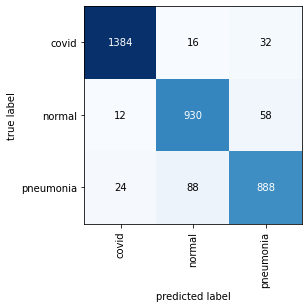

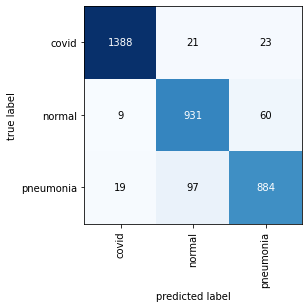

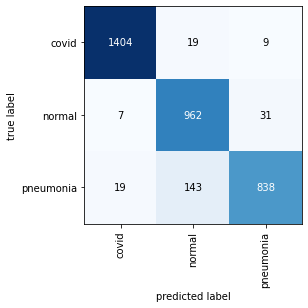

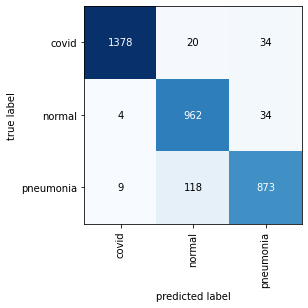

In [21]:
# loss_train_list = []
# loss_valid_list = []
# acc_train_list = []
# acc_valid_list = []

epochs = 50
total_time = time.time()
for e in range(epochs):
    start_time=time.time()
    train_loss = 0.0
    right_train = 0
    total_train = 0
    for data, labels in tqdm(trainloader):
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        net.train()
        # Forward Pass
        target = net(data)
        _, predicted = torch.max(target, 1)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        correct = (predicted == labels).float().sum()
        right_train+=correct.float()
        total_train+=len(predicted)
     
    valid_loss = 0.0
    right_valid = 0
    total_valid = 0
    #net.eval()     # Optional when not using Model Specific layer
    all_targets, all_predictions = [], []
    for data, labels in tqdm(validloader):
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = net(data)
        _, predicted = torch.max(target, 1)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
        correct = (predicted == labels).float().sum()
        right_valid+=correct.float()
        total_valid+=len(predicted)
        all_targets.extend(labels.to('cpu'))
        all_predictions.extend(predicted.to('cpu'))
    ftloss = train_loss / len(trainloader)
    fvloss = valid_loss / len(validloader)
    ftacc = float(right_train*100/total_train)
    fvacc = float(right_valid*100/total_valid)
    loss_train_list.append(ftloss)
    loss_valid_list.append(fvloss)
    acc_train_list.append(ftacc)
    acc_valid_list.append(fvacc)
    print('Epoch',e+101, '\tTraining Loss:',ftloss,'\tValidation Loss:',fvloss,"\t time:",convert(time.time()-start_time))
    print("Train Accuracy :",ftacc,"\tValidation Accuracy :",fvacc)
    if (min_valid_loss > valid_loss):
        print("Validation Loss Decreased (",min_valid_loss,"--->",valid_loss,") \t Saving The Model")
        min_valid_loss = valid_loss
        all_predictions = np.array(all_predictions)
        all_targets = np.array(all_targets)
        class_labels = np.unique(np.concatenate((all_targets, all_predictions)))
        if class_labels.shape[0] == 1:
            if class_labels[0] != 0:
                class_labels = np.array([0, class_labels[0]])
            else:
                class_labels = np.array([class_labels[0], 1])
        n_labels = class_labels.shape[0]
        lst = []
        z = list(zip(all_targets, all_predictions))
        for combi in product(class_labels, repeat=2):
            lst.append(z.count(combi))
        mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
        plot_confusion_matrix(mat, class_names=class_dict.values())
        plt.savefig("ConfusionMatrixLoss.png")
        # Saving State Dict
        torch.save(net.state_dict(), 'ResNeXt-101-32x8d_lossmodel_weights.pth')
        torch.save(net,"ResNeXt-101-32x8d_lossmodel.pt")
    if (max_valid_acc < fvacc):
        print("Validation Accuracy Increased (",max_valid_acc,"--->",fvacc,") \t Saving The Model")
        max_valid_acc = fvacc
        all_predictions = np.array(all_predictions)
        all_targets = np.array(all_targets)
        class_labels = np.unique(np.concatenate((all_targets, all_predictions)))
        if class_labels.shape[0] == 1:
            if class_labels[0] != 0:
                class_labels = np.array([0, class_labels[0]])
            else:
                class_labels = np.array([class_labels[0], 1])
        n_labels = class_labels.shape[0]
        lst = []
        z = list(zip(all_targets, all_predictions))
        for combi in product(class_labels, repeat=2):
            lst.append(z.count(combi))
        mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
        plot_confusion_matrix(mat, class_names=class_dict.values())
        plt.savefig("ConfusionMatrixAcc.png")
        # Saving State Dict
        torch.save(net.state_dict(), 'ResNeXt-101-32x8d_accmodel_weights.pth')
        torch.save(net,"ResNeXt-101-32x8d_accmodel.pt")
    if(fvacc>97):
        break
print("total time : ",convert(time.time()-total_time))
#playsound('C:/Users/mrper/Documents/research/audio')

In [21]:
torch.save(net.state_dict(), 'ResNeXt-101-32x8d_accmodel_weights_temp.pth')
torch.save(net,"ResNeXt-101-32x8d_accmodel_temp.pt")

In [7]:
# loss_train_list = []
# loss_valid_list = []
# acc_train_list = []
# acc_valid_list = []
# f = open("stats.txt","r")
# for i in f.readlines():
#     if "Loss" in i and "Epoch" in i:
#         e,t,v,time = i.split("\t")
#         train_acc = t.split(" ")[-2]
#         valid_acc = v.split(" ")[-2]
#         loss_train_list.append(float(train_acc))
#         loss_valid_list.append(float(valid_acc))
#     if "Train Accuracy" in i:
#         t,v = i.split("\t")
#         train_acc = t.split(" ")[-2]
#         valid_acc = v.split(" ")[-1]
#         #rint(train_acc)
#         acc_train_list.append(float(train_acc))
#         acc_valid_list.append(float(valid_acc))

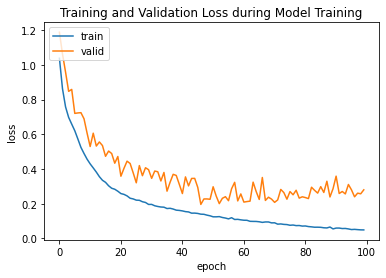

In [17]:
y_v = min(loss_valid_list)
x_v = loss_valid_list.index(y_v)+1
plt.plot(loss_train_list)
plt.plot(loss_valid_list)
#plt.annotate("min validation loss",(x_v,y_v))
plt.title('Training and Validation Loss during Model Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid','minimum'], loc='upper left')
plt.show()

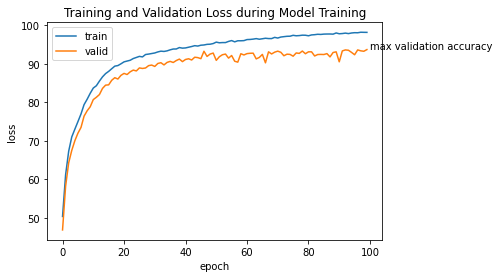

In [19]:
y_a = max(acc_valid_list)
x_a = acc_valid_list.index(y_a)+1
plt.plot(acc_train_list)
plt.plot(acc_valid_list)
plt.annotate("max validation accuracy",(x_a,y_a))
plt.title('Training and Validation Loss during Model Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
print(x_a,y_a,x_v)

In [84]:
f1 = open("loss_train.txt","w")
f2 = open("loss_valid.txt","w")
f3 = open("acc_train.txt","w")
f4 = open("acc_valid.txt","w")
for i in range(len(loss_train_list)):
    f1.write(str(loss_train_list[i]))
    f1.write(",")
    f2.write(str(loss_valid_list[i]))
    f2.write(",")
    f3.write(str(acc_train_list[i]))
    f3.write(",")
    f4.write(str(acc_valid_list[i]))
    f4.write(",")
f1.close()
f2.close()
f3.close()
f4.close()

In [ ]:
net.load_state_dict(torch.load("/home/user/research/inception/inception_model_weights.pth"))

In [20]:
net.load_state_dict(torch.load("ResNeXt-101-32x8d_accmodel_weights.pth"))

<All keys matched successfully>

In [21]:
right = 0
total = 0
#net.eval()
for data, labels in tqdm(validloader):
    if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).float().sum()
    right+=correct.float()
    total = total+len(predicted)
print(float(right*100/total))

100%|██████████████████████████████████████████████████████████████████████████████| 3432/3432 [04:21<00:00, 13.14it/s]

93.706298828125
